In [ ]:
# -*- coding: utf-8 -*-

"""

@ author: Taehyeong Kim

"""

import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# !pip install pmdarima
from pmdarima.arima import auto_arima

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FM/data/HAI 1.0/train-dataset/train1.csv')
data=data[["time","P1_B4022"]]
data['time']=pd.to_datetime(data['time'])
data = data.set_index('time')
data

,P1_B4022
time,
2019-09-11 20:00:00,35.7395
2019-09-11 20:00:01,35.7388
2019-09-11 20:00:02,35.7399
2019-09-11 20:00:03,35.7452
2019-09-11 20:00:04,35.7422
...,...
2019-09-15 09:59:55,35.2440
2019-09-15 09:59:56,35.2646
2019-09-15 09:59:57,35.2692


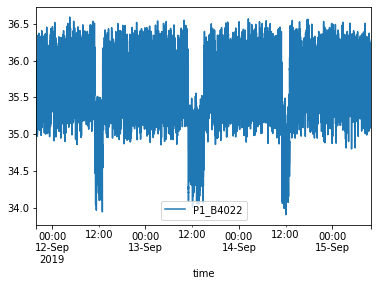

In [ ]:
# Raw data plot
fig = data.plot()

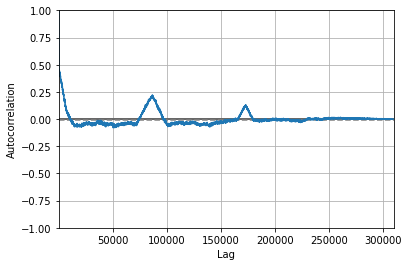

In [ ]:
autocorrelation_plot(data)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


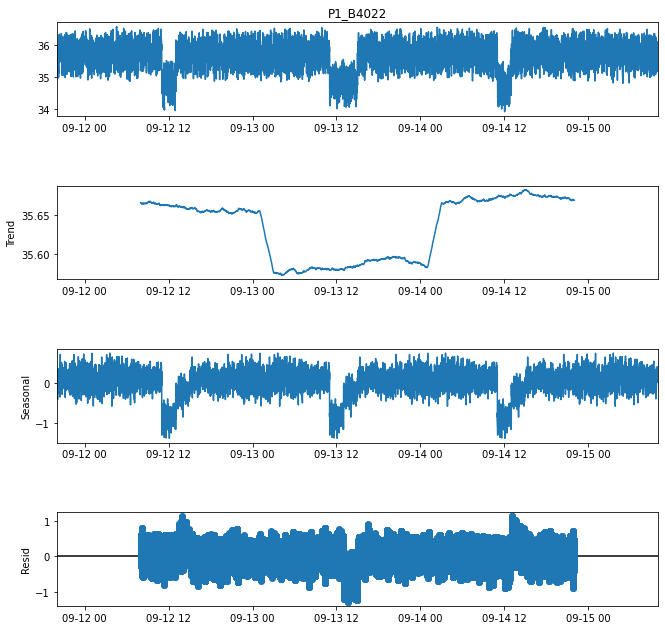

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data['P1_B4022'], model='additive', freq=86400)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

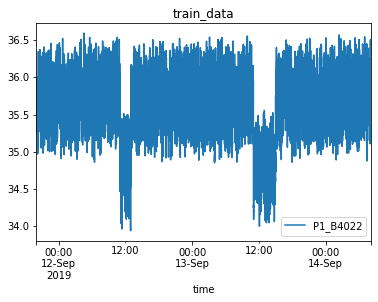

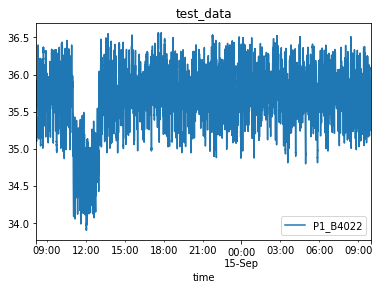

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)
train_data.plot()
plt.title("train_data")
plt.show()
test_data.plot()
plt.title("test_data")
plt.show()

In [ ]:
diff_train_data = train_data.copy()
diff_train_data = diff_train_data['P1_B4022'].diff(86400)
diff_train_data = diff_train_data.dropna()
print("####### Raw Data #######")
print(train_data)
print('### Differenced Data ###')
diff_train_data

####### Raw Data #######
                     P1_B4022
time                         
2019-09-11 20:00:00   35.7395
2019-09-11 20:00:01   35.7388
2019-09-11 20:00:02   35.7399
2019-09-11 20:00:03   35.7452
2019-09-11 20:00:04   35.7422
...                       ...
2019-09-14 08:11:55   35.5133
2019-09-14 08:11:56   35.4847
2019-09-14 08:11:57   35.4660
2019-09-14 08:11:58   35.4626
2019-09-14 08:11:59   35.4462

[216720 rows x 1 columns]
### Differenced Data ###


time
2019-09-12 20:00:00   -0.0240
2019-09-12 20:00:01   -0.0401
2019-09-12 20:00:02   -0.0629
2019-09-12 20:00:03   -0.0934
2019-09-12 20:00:04   -0.0939
                        ...  
2019-09-14 08:11:55   -0.5116
2019-09-14 08:11:56   -0.5344
2019-09-14 08:11:57   -0.5573
2019-09-14 08:11:58   -0.5615
2019-09-14 08:11:59   -0.5859
Name: P1_B4022, Length: 130320, dtype: float64

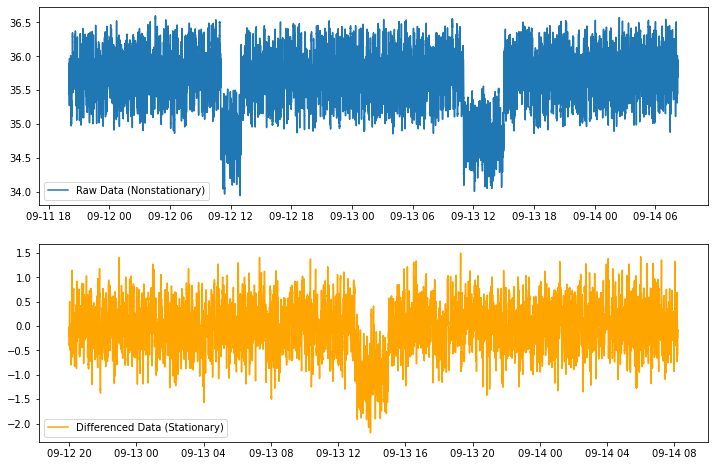

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['P1_B4022'])
plt.legend(['Raw Data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(['Differenced Data (Stationary)'])
plt.show()

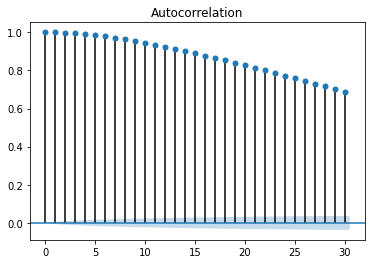

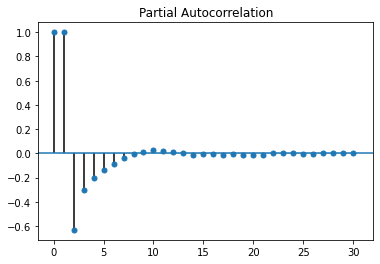

In [ ]:
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30)
plt.show()
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30)
plt.show()

* ARIMA

In [ ]:
# auto_arima_model = auto_arima(train_data, start_p=1, d=1, start_q=1,
#                               max_p=3, max_d=3, max_q=2, seasonal=False,
#                               trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)
# auto_arima_model.summary()

In [ ]:
# prediction=auto_arima_model.predict(len(test_data), return_conf_int=True)
# predicted_value = prediction[0]
# predicted_ub = prediction[1][:,0]
# predicted_lb = prediction[1][:,1]
# predict_index = list(test_data.index)
# r2 = r2_score(test_data, predicted_value)
# r2

In [ ]:
# plt.figure(figsize=(10,8))
# sns.lineplot(test_data.index, test_data["P1_B4022"])
# sns.lineplot(test_data.index, prediction[0])
# plt.title(f'ARIMA {auto_arima_model.order}')
# plt.show()

* SARIMA

In [ ]:
# auto_sarima_model = auto_arima(train_data, start_p=2, d=1, start_q=2,
#                               max_p=2, max_q=2,  seasonal=True,
#                               m=24, max_P=2, D=1, max_Q=2, 
#                               trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)
# auto_sarima_model.summary()

In [ ]:
# prediction=auto_sarima_model.predict(len(test_data), return_conf_int=True)
# predicted_value = prediction[0]
# predicted_ub = prediction[1][:,0]
# predicted_lb = prediction[1][:,1]
# predict_index = list(test_data.index)
# r2 = r2_score(test_data, predicted_value)
# r2

In [ ]:
# plt.figure(figsize=(12,10))
# sns.lineplot(test_data.index, test_data["P1_B4022"])
# sns.lineplot(test_data.index, prediction[0], marker='s', color='r')
# plt.title(f'SARIMA {auto_sarima_model.order}')
# plt.show()